In [1]:
pip install pydataset

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pydataset import data
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from numpy import expand_dims 

In [3]:
ds = data()
print(ds)

        dataset_id                                             title
0    AirPassengers       Monthly Airline Passenger Numbers 1949-1960
1          BJsales                 Sales Data with Leading Indicator
2              BOD                         Biochemical Oxygen Demand
3     Formaldehyde                     Determination of Formaldehyde
4     HairEyeColor         Hair and Eye Color of Statistics Students
..             ...                                               ...
752        VerbAgg                  Verbal Aggression item responses
753           cake                 Breakage Angle of Chocolate Cakes
754           cbpp                 Contagious bovine pleuropneumonia
755    grouseticks  Data on red grouse ticks from Elston et al. 2001
756     sleepstudy       Reaction times in a sleep deprivation study

[757 rows x 2 columns]


In [4]:
data_string = 'diamonds'
data(data_string, show_doc=True)
df = data(data_string)
df = df.sample(frac=1).reset_index(drop=True)

diamonds

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Prices of 50,000 round cut diamonds

### Description

A dataset containing the prices and other attributes of almost 54,000
diamonds. The variables are as follows:

### Usage

    data(diamonds)

### Format

A data frame with 53940 rows and 10 variables

### Details

  * price. price in US dollars (\$326–\$18,823) 

  * carat. weight of the diamond (0.2–5.01) 

  * cut. quality of the cut (Fair, Good, Very Good, Premium, Ideal) 

  * colour. diamond colour, from J (worst) to D (best) 

  * clarity. a measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best)) 

  * x. length in mm (0–10.74) 

  * y. width in mm (0–58.9) 

  * z. depth in mm (0–31.8) 

  * depth. total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79) 

  * table. width of top of diamond relative to widest point (43–95) 




In [5]:
df.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.56,Ideal,G,VS2,61.7,56.0,1698,5.34,5.30,3.28
1,0.54,Premium,D,SI1,62.3,60.0,1715,5.22,5.18,3.24
2,1.06,Good,I,SI2,58.7,60.0,3842,6.65,6.71,3.92
3,0.31,Ideal,G,IF,61.6,55.0,891,4.37,4.39,2.70
4,0.50,Very Good,H,IF,61.4,61.0,1923,5.14,5.03,3.12
5,0.35,Ideal,E,VS2,62.4,57.0,984,4.55,4.52,2.83
6,0.52,Ideal,E,VS2,60.4,57.0,1694,5.22,5.17,3.14
7,0.70,Very Good,D,VS1,62.8,59.0,3247,5.63,5.68,3.55
8,1.53,Ideal,G,SI2,62.5,57.0,9596,7.39,7.32,4.60
9,1.04,Ideal,G,VS2,59.4,58.0,6286,6.63,6.67,3.95


To calculate the volume of a diamond given the length of its three dimensions (x, y, and z), you can use the formula for the volume of a rectangular prism:

Volume = x * y * z

However, since a diamond is not a perfect rectangular prism, you need to adjust the formula to account for its unique shape. The most common shape for a diamond is a variation of a truncated octahedron, with eight equilateral triangular faces and six square faces. To calculate the volume of a diamond with this shape, you can use the following formula:

Volume = (4/3) * (x/2) * (y/2) * (z/2) * √2

In this formula, (x/2), (y/2), and (z/2) represent the lengths of the diamond's semi-axes, and √2 is the square root of 2.

Note that this formula assumes that the diamond has a symmetrical shape, which is not always the case. Additionally, the formula only provides an estimate of the diamond's volume, since the actual volume may be slightly different depending on the diamond's specific shape and proportions.

In [6]:
# volume calculation
df['vol'] = (4/3)*(df['x']/2)*(df['y']/2)*(df['z']/2)*np.sqrt(2)

The 4Cs of diamond quality - Cut, Color, Clarity, and Carat weight - have a significant impact on the price of a diamond. These factors are all important to consider when evaluating the value of a diamond, and they are typically used by professionals in the diamond industry to determine a diamond's worth. The order in which these factors affect the price of a diamond can vary depending on the specific diamond and market conditions, but generally, the order of importance is:

    Cut - A diamond's cut has the largest impact on its beauty and brilliance, and therefore its value. A well-cut diamond will reflect light in a way that makes it sparkle and shine, while a poorly cut diamond may appear dull and lifeless.

    Clarity - Clarity refers to the number and type of internal and external imperfections, or inclusions, that a diamond has. The fewer inclusions a diamond has, the more valuable it is.

    Color - Diamond color refers to the presence or absence of color in a diamond. The most valuable diamonds are those that are completely colorless, or "white", while those with a noticeable yellow or brown tint are less valuable.

    Carat weight - Carat weight is a measure of a diamond's size, and larger diamonds are generally more valuable than smaller ones.
    
    The order from worst to best for cuts, based on the GIA (Gemological Institute of America) grading scale, is:

    Fair
    Good
    Very Good
    Premium
    Ideal

According to the GIA, a diamond's cut grade reflects how well it interacts with light to create brightness, fire, and scintillation. A diamond with a higher cut grade will generally be more brilliant and have more fire and sparkle. The GIA cut grading scale ranges from "Excellent" (formerly known as "Ideal") to "Poor," with five categories in total: Excellent, Very Good, Good, Fair, and Poor.

The following is the order from best to worst for clarity based on the GIA (Gemological Institute of America) grading scale:

    IF (Internally Flawless)
    VVS1 (Very, Very Slightly Included 1)
    VVS2 (Very, Very Slightly Included 2)
    VS1 (Very Slightly Included 1)
    VS2 (Very Slightly Included 2)
    SI1 (Slightly Included 1)
    SI2 (Slightly Included 2)
    I1 (Included 1)

According to the GIA, a diamond's clarity grade reflects the presence or absence of inclusions and blemishes, and their size, location, and visibility. Diamonds with higher clarity grades have fewer and smaller inclusions, and are more rare and valuable. The GIA clarity grading scale ranges from "Flawless" to "Included," with six categories in total: Flawless (FL), Internally Flawless (IF), Very Very Slightly Included (VVS1 and VVS2), Very Slightly Included (VS1 and VS2), Slightly Included (SI1 and SI2), and Included (I1, I2, and I3).

The following is the order from best to worst for color based on the GIA (Gemological Institute of America) grading scale:

    D - Colorless
    E - Colorless
    F - Colorless or Near Colorless
    G - Near Colorless
    H - Near Colorless
    I - Near Colorless or Faint Yellow
    J - Faint Yellow

According to the GIA, a diamond's color grade reflects how much color is present in a diamond, with the most valuable diamonds having the least amount of color. The GIA color grading scale ranges from D (completely colorless) to Z (yellow or brown), with a range of categories in between.


view order of unique entries, helps to create conversion lists

In [7]:
def unique(name:str):
    print(df[name].unique())
    return None

test_cols = ['cut','color','clarity']
for i in test_cols:
    unique(i)


['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['G' 'D' 'I' 'H' 'E' 'F' 'J']
['VS2' 'SI1' 'SI2' 'IF' 'VS1' 'VVS1' 'VVS2' 'I1']


In [8]:
def to_number(column:str,cut_nums:list):
    
    cut_names = (df[column].unique())

    for i in range(len(cut_names)):
        print(f'converting:{cut_names[i],cut_nums[i]}')
        df.loc[df[column].isin([cut_names[i]]),column]=cut_nums[i]
        [2,3,5,4,6,7,8,1]
    return df

df = to_number('cut',[5,4,2,3,1])
df = to_number('clarity',[2,3,5,4,6,7,1,8])
df = to_number('color',[6,2,1,3,5,4,7])

converting:('Ideal', 5)
converting:('Premium', 4)
converting:('Good', 2)
converting:('Very Good', 3)
converting:('Fair', 1)
converting:('VS2', 2)
converting:('SI1', 3)
converting:('SI2', 5)
converting:('IF', 4)
converting:('VS1', 6)
converting:('VVS1', 7)
converting:('VVS2', 1)
converting:('I1', 8)
converting:('G', 6)
converting:('D', 2)
converting:('I', 1)
converting:('H', 3)
converting:('E', 5)
converting:('F', 4)
converting:('J', 7)


In [9]:
df.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,0.56,5,6,2,61.7,56.0,1698,5.34,5.30,3.28,21.880373
1,0.54,4,2,3,62.3,60.0,1715,5.22,5.18,3.24,20.649475
2,1.06,2,1,5,58.7,60.0,3842,6.65,6.71,3.92,41.228163
3,0.31,5,6,4,61.6,55.0,891,4.37,4.39,2.70,12.208814
4,0.50,3,3,4,61.4,61.0,1923,5.14,5.03,3.12,19.012947
5,0.35,5,5,2,62.4,57.0,984,4.55,4.52,2.83,13.718291
6,0.52,5,5,2,60.4,57.0,1694,5.22,5.17,3.14,19.973512
7,0.70,3,2,6,62.8,59.0,3247,5.63,5.68,3.55,26.757703
8,1.53,5,6,5,62.5,57.0,9596,7.39,7.32,4.60,58.651227
9,1.04,5,6,2,59.4,58.0,6286,6.63,6.67,3.95,41.171833


In [10]:
def remove_outliers(dataframe, multiple=1.5):
    clean_df = dataframe.copy()
    
    for column in clean_df.columns:
        #print(column)
        Q1 = clean_df[column].quantile(0.25)
        Q3 = clean_df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiple * IQR
        upper_bound = Q3 + multiple * IQR
        
        clean_df = clean_df[(clean_df[column] >= lower_bound) & (clean_df[column] <= upper_bound)]
    
    return clean_df

print(len(df))
df = remove_outliers(df)
print(len(df))

53940
46515


In [11]:
def normalize(df,col,max_var_list):
    max_var_list.append(np.max(df[col]))
    df[col] = df[col]/np.max(df[col])
    return df,max_var_list
var_list = ['price','carat','cut','color','vol','clarity']
max_var_list = []
for i in var_list:
    df,max_var_list = normalize(df,i,max_var_list) 
print(max_var_list)

[11040, 2.0, 5, 7, 73.73143828788369, 8]


In [12]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,0.280,1.0,0.857143,0.25,61.7,56.0,0.153804,5.34,5.30,3.28,0.296758
1,0.270,0.8,0.285714,0.375,62.3,60.0,0.155344,5.22,5.18,3.24,0.280063
3,0.155,1.0,0.857143,0.5,61.6,55.0,0.080707,4.37,4.39,2.70,0.165585
4,0.250,0.6,0.428571,0.5,61.4,61.0,0.174185,5.14,5.03,3.12,0.257868
5,0.175,1.0,0.714286,0.25,62.4,57.0,0.089130,4.55,4.52,2.83,0.186058
6,0.260,1.0,0.714286,0.25,60.4,57.0,0.153442,5.22,5.17,3.14,0.270895
7,0.350,0.6,0.285714,0.75,62.8,59.0,0.294112,5.63,5.68,3.55,0.362908
8,0.765,1.0,0.857143,0.625,62.5,57.0,0.869203,7.39,7.32,4.60,0.795471
9,0.520,1.0,0.857143,0.25,59.4,58.0,0.569384,6.63,6.67,3.95,0.558403
11,0.160,1.0,0.857143,0.75,61.3,55.0,0.075000,4.46,4.42,2.72,0.171410


view separate relations

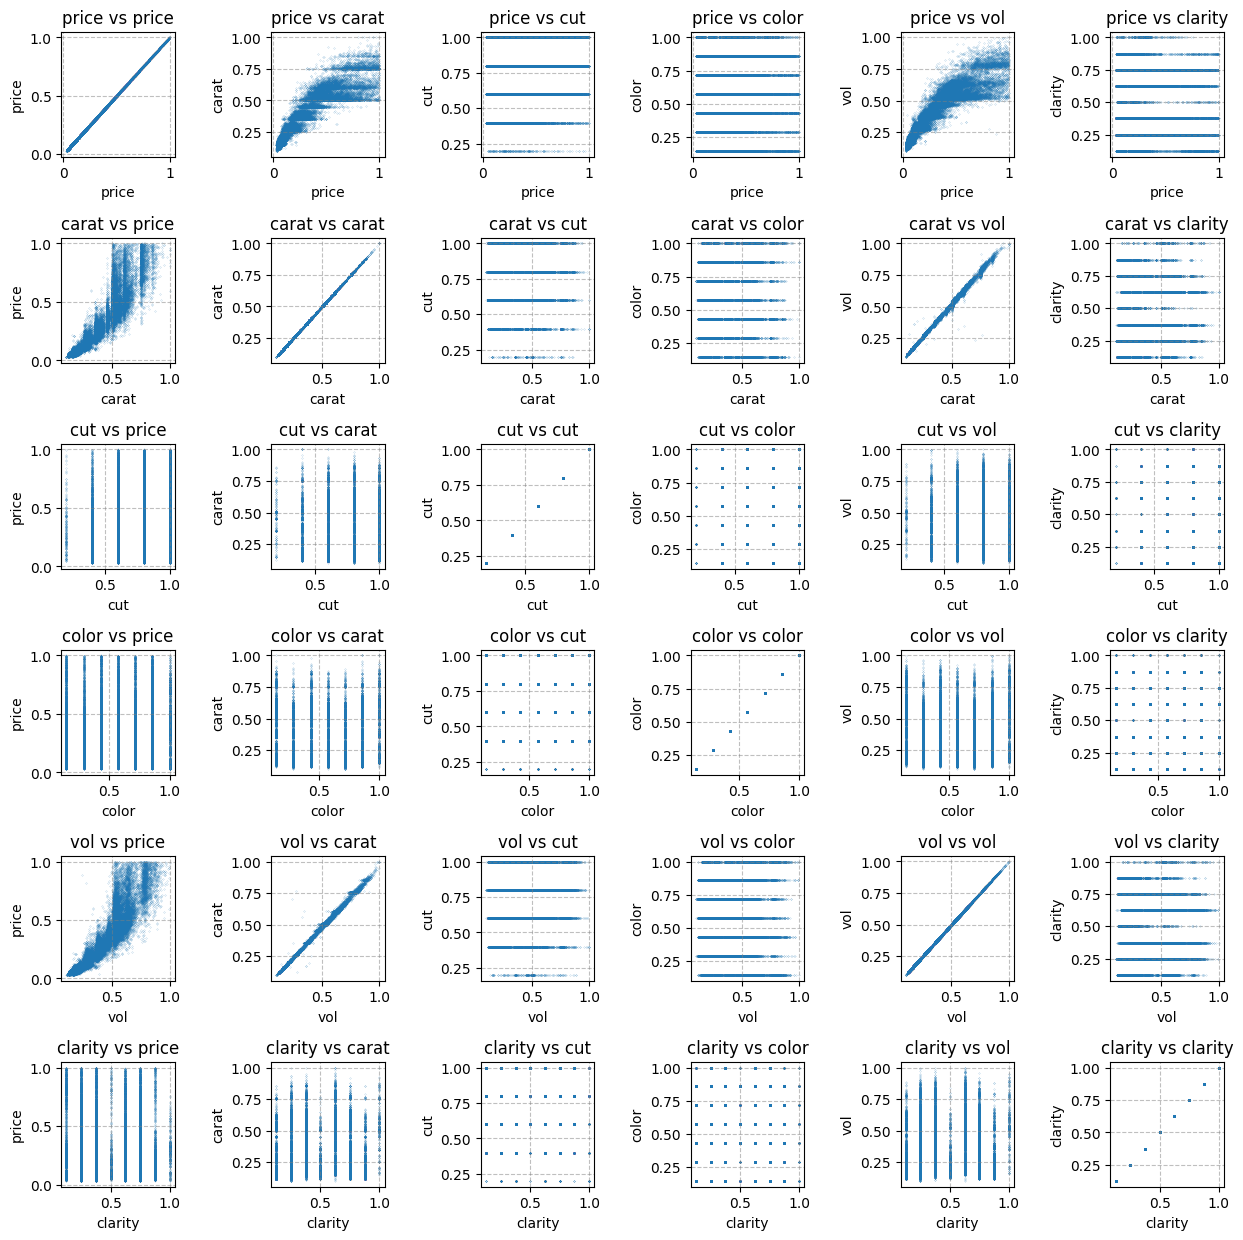

In [13]:
_,df_visual = train_test_split(df,test_size=0.9)

var_list = ['price','carat','cut','color','vol','clarity']

fig, axes = plt.subplots(nrows=len(var_list), ncols=len(var_list), figsize=(15, 15))

i = 0
j = 0

for x in var_list:
    for y in var_list:
        axes[i][j].scatter(df_visual[x],df_visual[y],0.01)
        # Add some space between subplots
        plt.subplots_adjust(wspace=0.85)
        plt.subplots_adjust(hspace=0.65)
        axes[i][j].set_xlabel(x)
        axes[i][j].set_ylabel(y)
        axes[i][j].set_title(f'{x} vs {y}')
        axes[i][j].grid(alpha=0.5, linestyle='--', color='gray')
        j += 1
        if j > len(var_list)-1:
            j = 0
    i += 1


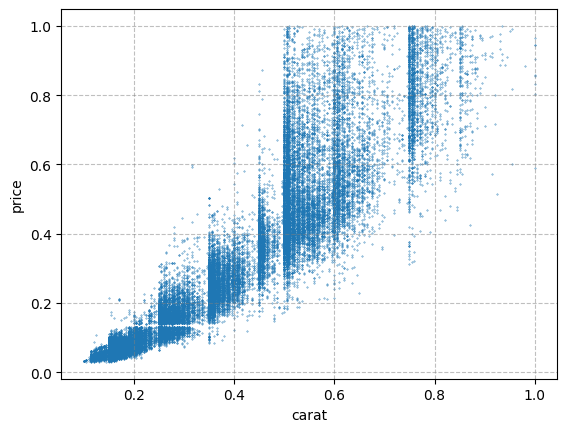

In [14]:
plt.scatter(df['carat'],df['price'],0.1)
plt.xlabel('carat')
plt.ylabel('price')
plt.grid(alpha=0.5, linestyle='--', color='gray')

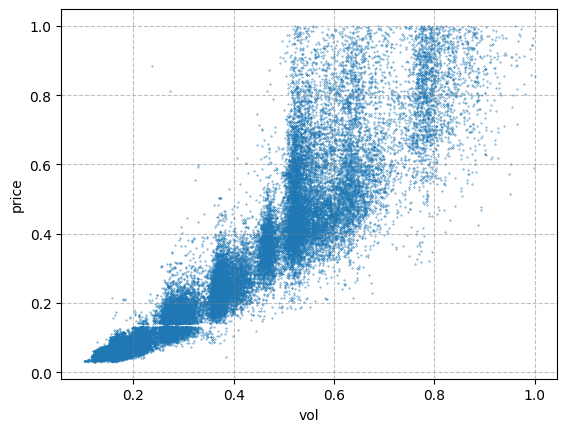

In [15]:
plt.scatter(df['vol'],df['price'],0.1)
plt.xlabel('vol')
plt.ylabel('price')
plt.grid(alpha=0.5, linestyle='--', color='gray')

In [16]:
x_train,x_test,y_train,y_test = train_test_split(df['carat'],df['price'],test_size=0.1,shuffle=False)

In [17]:
import tensorflow as tf

#
# REGRESSION
#
ValidationSplit = 0.2
BatchSize       = 100
Nepochs         = 500
DropoutValue    = 0.2
learning_rate   = 0.001 

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(DropoutValue),
  tf.keras.layers.Dense(1,activation='linear')
])


print("--------------------------------------------------------------------------------------------------------------")
print("\033[ TTRAINING REGRESSION MODEL...\033[0m")
print("--------------------------------------------------------------------------------------------------------------\n\n")
print("Dropout values       = ", DropoutValue)
print("ValidationSplit      = ", ValidationSplit)
print("BatchSize            = ", BatchSize)
print("Nepochs              = ", Nepochs)

loss_fn = tf.keras.losses.MeanSquaredError()

model.compile(metrics=['MSE','MAE'],optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=loss_fn)
history  = model.fit(x_train, y_train, validation_split=ValidationSplit, batch_size=BatchSize, epochs=Nepochs)


--------------------------------------------------------------------------------------------------------------
[ TTRAINING REGRESSION MODEL...
--------------------------------------------------------------------------------------------------------------


Dropout values       =  0.2
ValidationSplit      =  0.2
BatchSize            =  100
Nepochs              =  500
Epoch 1/500
335/335 [==============================] - 1s 1ms/step - loss: 0.0170 - MSE: 0.0170 - MAE: 0.0867 - val_loss: 0.0078 - val_MSE: 0.0078 - val_MAE: 0.0569
Epoch 2/500
335/335 [==============================] - 0s 944us/step - loss: 0.0085 - MSE: 0.0085 - MAE: 0.0572 - val_loss: 0.0076 - val_MSE: 0.0076 - val_MAE: 0.0520
Epoch 3/500
335/335 [==============================] - 0s 982us/step - loss: 0.0083 - MSE: 0.0083 - MAE: 0.0554 - val_loss: 0.0075 - val_MSE: 0.0075 - val_MAE: 0.0518
Epoch 4/500
335/335 [==============================] - 0s 943us/step - loss: 0.0082 - MSE: 0.0082 - MAE: 0.0549 - val_loss: 0.0078 -

Display the evolution of the loss,MSE,MAE as a function of the training epoch



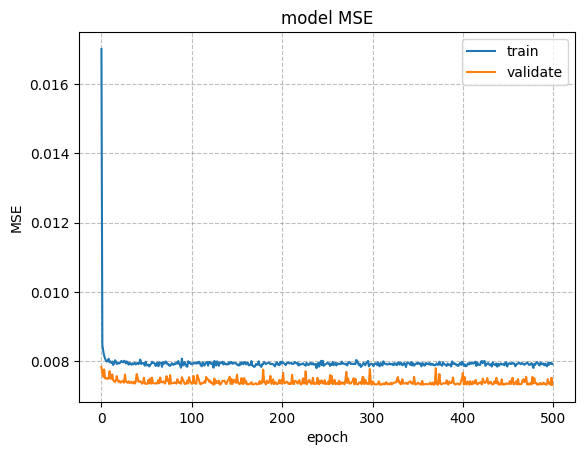

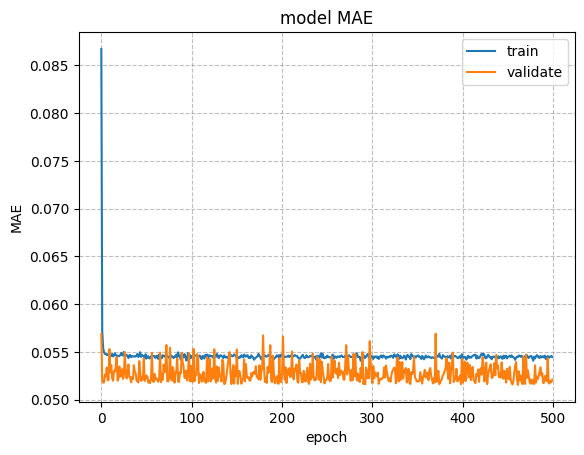

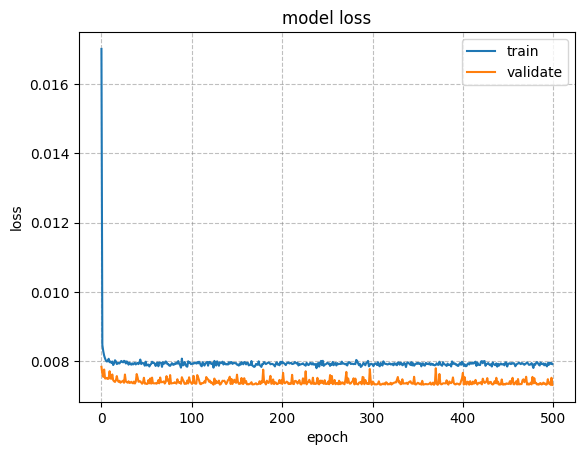

146/146 - 0s - loss: 0.0082 - MSE: 0.0082 - MAE: 0.0536 - 72ms/epoch - 494us/step
loss = 0.008
MSE = 0.008
MAE = 0.054

Display the model prediction against the ground truth from test data

146/146 [==============================] - 0s 390us/step
predictions: 4652


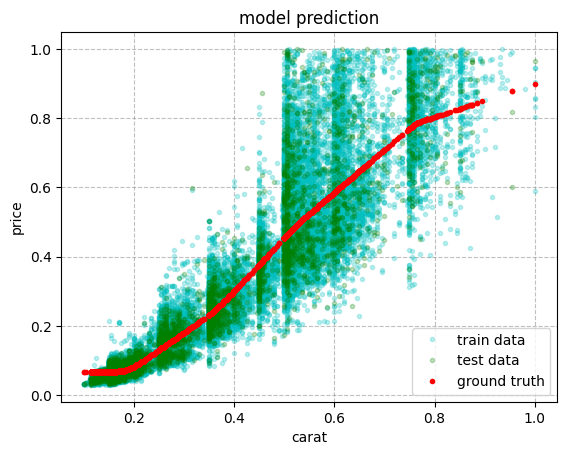

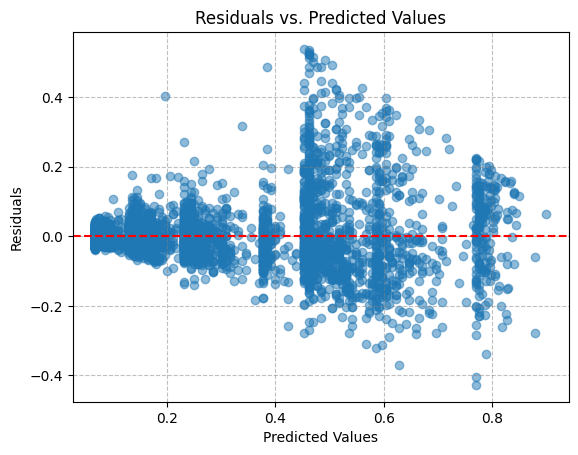

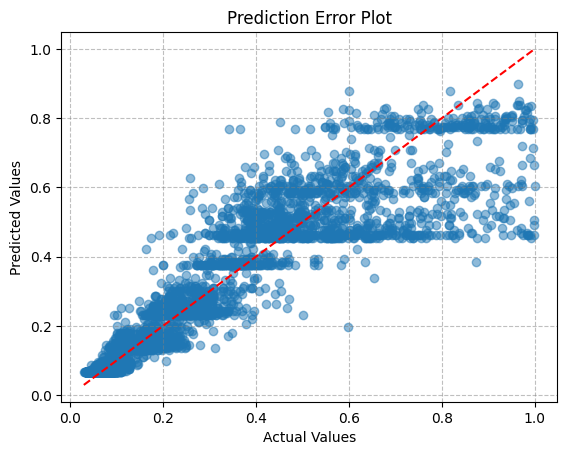

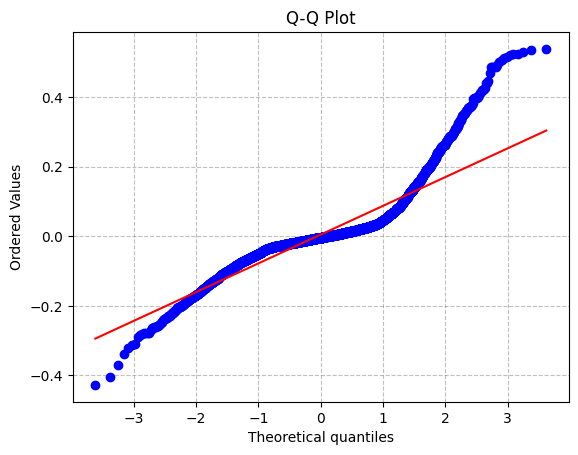

In [18]:
print("\033[1mDisplay the evolution of the loss,MSE,MAE as a function of the training epoch\033[0m\n")

# summarize history for MSE
plt.plot(history.history['MSE'])
plt.plot(history.history['val_MSE'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.grid(alpha=0.5, linestyle='--', color='gray')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.clf()

# summarize history for MAE
plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.grid(alpha=0.5, linestyle='--', color='gray')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.clf()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(alpha=0.5, linestyle='--', color='gray')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.clf()

# having finished training the model, use this to evaluate the performance on an
# independent sample of test data
loss,MSE,MAE = model.evaluate(x_test,  y_test, verbose=2)
print("loss = {:5.3f}".format(loss))
print("MSE = {:5.3f}".format(MSE))
print("MAE = {:5.3f}".format(MAE))

print("\n\033[1mDisplay the model prediction against the ground truth from test data\033[0m\n")

#
# use the model to make predictions based on the unseen test data
#
y_predict = model.predict(x_test)
print(f'predictions: {len(y_predict)}')
plt.plot(x_train,y_train,'c.',alpha=0.25)
plt.plot(x_test,y_test,'g.',alpha=0.25)
plt.plot(x_test, y_predict, "r.")
plt.title('model prediction')
plt.ylabel('price')
plt.grid(alpha=0.5, linestyle='--', color='gray')
plt.xlabel('carat')
plt.legend(['train data','test data', 'ground truth'], loc='lower right')
plt.show()
plt.clf()

# Calculate residuals
residuals = [y_test - y_predict for y_test, y_predict in zip(y_test, y_predict)]
residuals_nums = []
for i in residuals:
    residuals_nums.append(i[0])

# Create a residuals plot
plt.scatter(y_predict, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(alpha=0.5, linestyle='--', color='gray')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Create a prediction error plot
plt.scatter(y_test, y_predict, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(alpha=0.5, linestyle='--', color='gray')
plt.title('Prediction Error Plot')
plt.show()

# Create a Q-Q plot
stats.probplot(residuals_nums, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.grid(alpha=0.5, linestyle='--', color='gray')
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pydataset import data
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from numpy import expand_dims 

In [20]:
ds = data()
data_string = 'diamonds'
data(data_string, show_doc=False)
df = data(data_string)
df = df.sample(frac=1).reset_index(drop=True)

In [21]:
def to_number(column:str,cut_nums:list):
    
    cut_names = (df[column].unique())

    for i in range(len(cut_names)):
        print(f'converting:{cut_names[i],cut_nums[i]}')
        df.loc[df[column].isin([cut_names[i]]),column]=cut_nums[i]
        [2,3,5,4,6,7,8,1]
    return df

df = to_number('cut',[5,4,2,3,1])
df = to_number('clarity',[2,3,5,4,6,7,1,8])
df = to_number('color',[6,2,1,3,5,4,7])

converting:('Ideal', 5)
converting:('Very Good', 4)
converting:('Fair', 2)
converting:('Premium', 3)
converting:('Good', 1)
converting:('VS2', 2)
converting:('SI1', 3)
converting:('VVS2', 5)
converting:('VS1', 4)
converting:('SI2', 6)
converting:('I1', 7)
converting:('VVS1', 1)
converting:('IF', 8)
converting:('G', 6)
converting:('I', 2)
converting:('E', 1)
converting:('F', 3)
converting:('J', 5)
converting:('H', 4)
converting:('D', 7)


In [22]:
print(len(df))
df = remove_outliers(df)
print(len(df))

53940
46532


In [23]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.31,5,6,2,62.2,53.6,557,4.32,4.35,2.70
2,1.51,5,2,3,62.8,54.0,8574,7.31,7.27,4.58
3,1.07,4,2,3,61.8,60.0,4307,6.52,6.56,4.04
5,0.36,4,1,3,60.8,59.0,631,4.56,4.59,2.78
6,0.36,4,6,4,62.9,57.0,726,4.56,4.60,2.88
7,0.33,5,1,2,61.9,56.0,723,4.43,4.46,2.75
8,0.74,3,6,4,59.5,58.0,2574,5.95,5.89,3.52
9,1.73,3,3,6,62.4,60.0,9494,7.60,7.55,4.73
10,1.16,4,1,6,62.4,55.0,5034,6.69,6.77,4.20
11,0.60,5,1,2,62.0,57.0,2061,5.41,5.42,3.36


['carat', 'cut', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


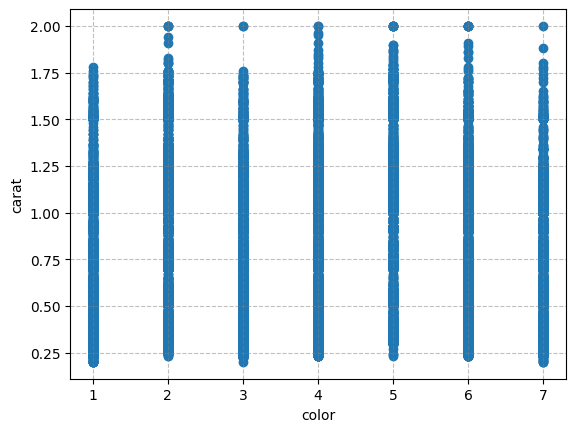

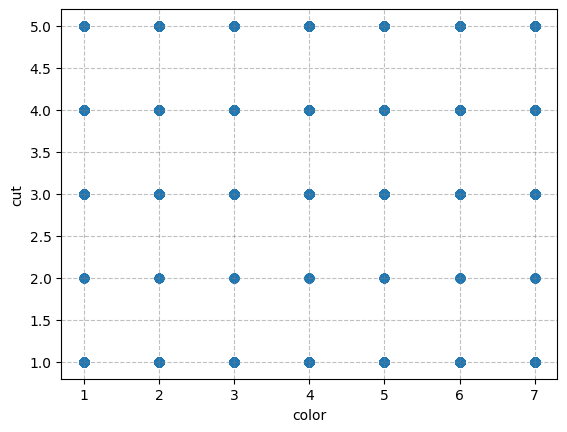

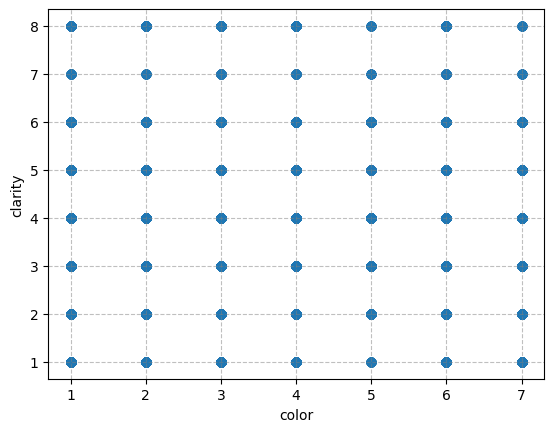

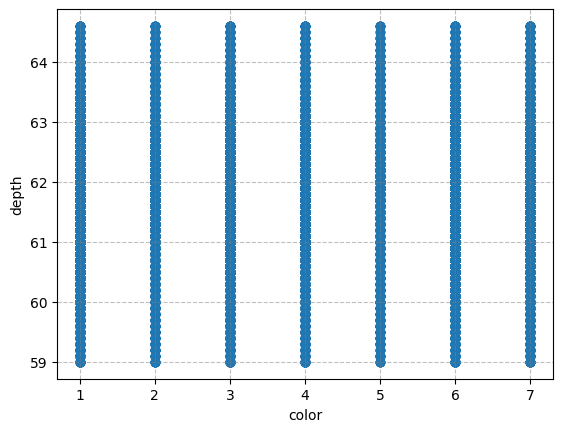

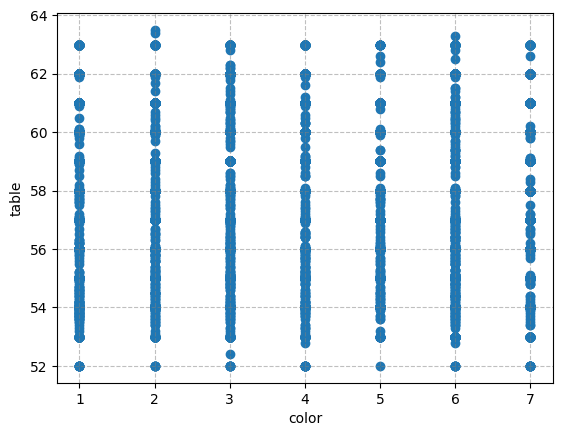

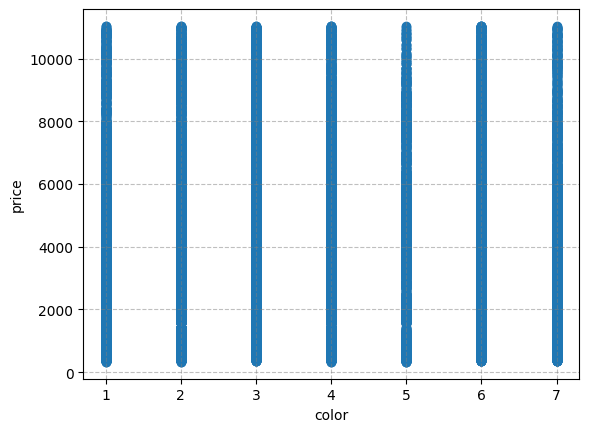

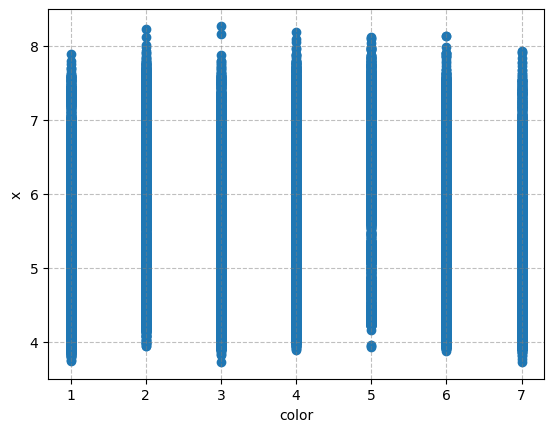

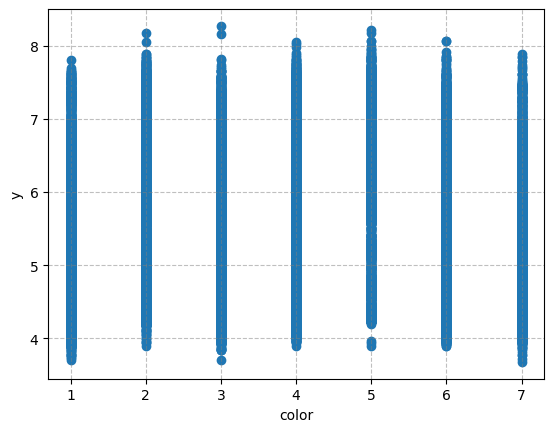

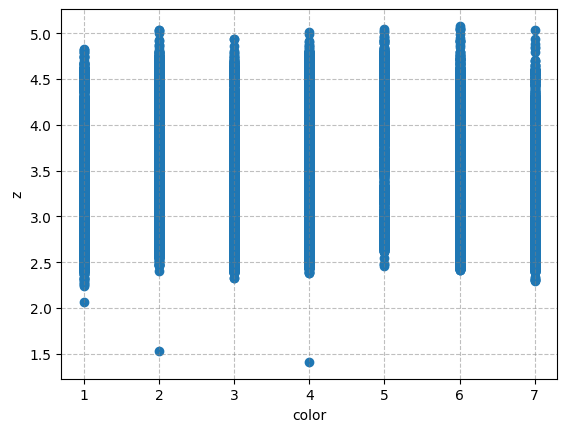

<Figure size 640x480 with 0 Axes>

In [24]:
col_list = list(df.columns)
pred_col = 'color'
col_list.remove(pred_col)

print(col_list)
for i in col_list:
    plt.scatter(df[pred_col],df[i])
    plt.xlabel(pred_col)
    plt.ylabel(i)
    plt.grid(alpha=0.5, linestyle='--', color='gray')
    plt.figure()

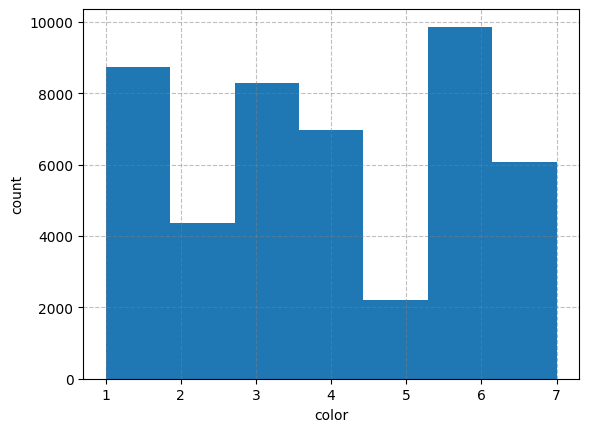

In [25]:
plt.hist(df[pred_col],bins=len(df[pred_col].unique()))
plt.xlabel(pred_col)
plt.ylabel('count')
plt.grid(alpha=0.5, linestyle='--', color='gray')

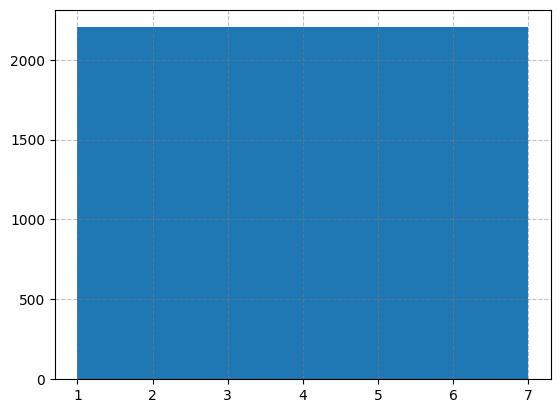

In [26]:
import pandas as pd
import numpy as np

counts = df[pred_col].value_counts()

# find the smallest count among all unique values
target_count = np.min(counts)

# randomly sampling rows from original DataFrame to reach the target count for each unique value
subsets = []
for value in counts.index:
    subset = df[df[pred_col] == value].sample(target_count, replace=True)
    subsets.append(subset)

# concatenate rows for each unique value into new balanced DataFrame

balanced_df = pd.concat(subsets)
df = balanced_df
plt.hist(df[pred_col],bins=len(df[pred_col].unique()))
plt.grid(alpha=0.5, linestyle='--', color='gray')

In [27]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

X = df.drop(pred_col, axis=1)
y = df[pred_col]

X = df.values
num_samples = X.shape[0]
num_timesteps = 1  
num_features = X.shape[1]
X = X.reshape(num_samples, num_timesteps, num_features)

# split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [28]:
from tensorflow.keras.utils import to_categorical

X_train = np.array(X_train, dtype=np.float32)
X_test  = np.array(X_test,  dtype=np.float32)

y_train = np.array(y_train, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)

classes = 1+len(df[pred_col].unique())

y_train_one_hot = to_categorical(y_train, num_classes=classes)
y_test_one_hot  = to_categorical(y_test, num_classes=classes)

In [29]:
print(y_test[:20])
print(y_test_one_hot[:20])

[1. 4. 1. 1. 2. 4. 2. 2. 3. 5. 3. 1. 4. 2. 5. 7. 1. 6. 6. 1.]
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


In [30]:
X_train.shape

(12336, 1, 10)

In [31]:
y_train_one_hot.shape

(12336, 8)

In [32]:
print(len(df[pred_col].unique()))

7


In [33]:
model = Sequential()
model.add(Conv1D(32, 16, activation='relu', input_shape=(num_timesteps, num_features), padding='same'))
model.add(Conv1D(64, 16, activation='relu', input_shape=(num_timesteps, num_features), padding='same'))
# model.add(MaxPooling1D(2))  # Remove this line
model.add(Flatten())
model.add(Dense(classes))
model.compile(metrics=['accuracy'],optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=loss_fn)
history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
309/309 [==============================] - 0s 1ms/step - loss: 3.1969 - accuracy: 0.1454 - val_loss: 0.1228 - val_accuracy: 0.1568
Epoch 2/100
309/309 [==============================] - 0s 867us/step - loss: 0.1159 - accuracy: 0.1578 - val_loss: 0.1128 - val_accuracy: 0.2115
Epoch 3/100
309/309 [==============================] - 0s 846us/step - loss: 0.1138 - accuracy: 0.2034 - val_loss: 0.1141 - val_accuracy: 0.1989
Epoch 4/100
309/309 [==============================] - 0s 882us/step - loss: 0.1126 - accuracy: 0.2233 - val_loss: 0.1340 - val_accuracy: 0.1447
Epoch 5/100
309/309 [==============================] - 0s 894us/step - loss: 0.1169 - accuracy: 0.2210 - val_loss: 0.1071 - val_accuracy: 0.2638
Epoch 6/100
309/309 [==============================] - 0s 895us/step - loss: 0.1151 - accuracy: 0.2353 - val_loss: 0.1263 - val_accuracy: 0.2229
Epoch 7/100
309/309 [==============================] - 0s 856us/step - loss: 0.1163 - accuracy: 0.2393 - val_loss: 0.1104 - val_accu

Display the evolution of the loss,MSE,MAE as a function of the training epoch



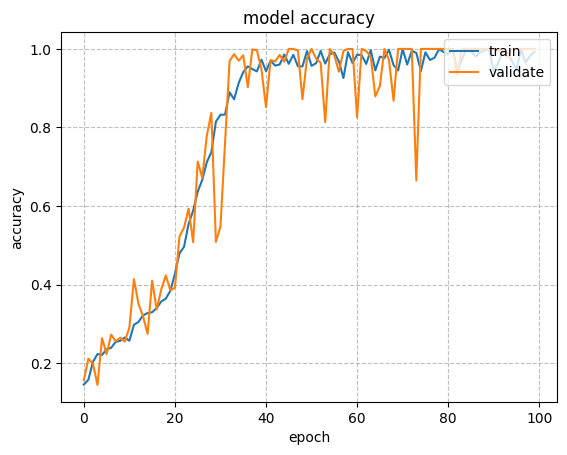

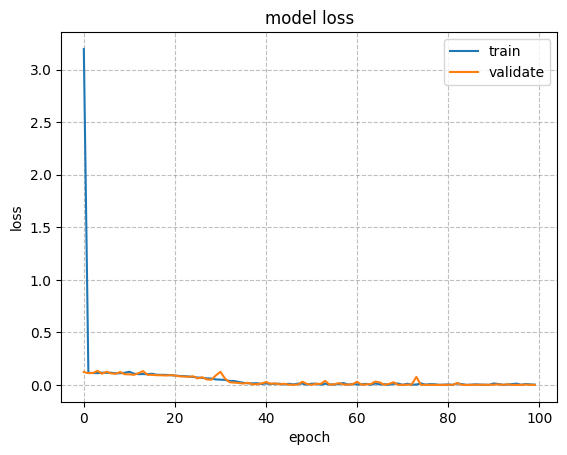

97/97 - 0s - loss: 4.1462e-04 - accuracy: 1.0000 - 61ms/epoch - 629us/step
loss = 0.000
accuracy = 1.000


<Figure size 640x480 with 0 Axes>

In [34]:
print("\033[1mDisplay the evolution of the loss,MSE,MAE as a function of the training epoch\033[0m\n")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.grid(alpha=0.5, linestyle='--', color='gray')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.clf()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(alpha=0.5, linestyle='--', color='gray')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.clf()

# having finished training the model, use this to evaluate the performance on an
# independent sample of test data
loss,accuracy = model.evaluate(X_test,  y_test_one_hot, verbose=2)
print("loss = {:5.3f}".format(loss))
print("accuracy = {:5.3f}".format(accuracy))

In [35]:
print("\n\033[1mDisplay the model prediction against the ground truth from test data\033[0m\n")
y_predict = model.predict(X_test)

y_pred = []
for i in y_predict:
    y_pred.append(np.argmax(i))
    
data = {'actual': y_test, 'pred': y_pred}
df_0 = pd.DataFrame(data)
print(df_0.head(10))
class_list = list((df_0['actual'].unique()))

accuracy_list = []
for i in class_list:
    
    df_acc = df_0.loc[df_0['actual'] == i]
    num_identical = sum(df_acc['actual'] == df_acc['pred'])
    num_rows = len(df_acc)
    percent_identical = num_identical / num_rows * 100
    accuracy_list.append(percent_identical)



Display the model prediction against the ground truth from test data

97/97 [==============================] - 0s 464us/step
   actual  pred
0     1.0     1
1     4.0     4
2     1.0     1
3     1.0     1
4     2.0     2
5     4.0     4
6     2.0     2
7     2.0     2
8     3.0     3
9     5.0     5


Text(0, 0.5, 'prediction accuracy percentage')

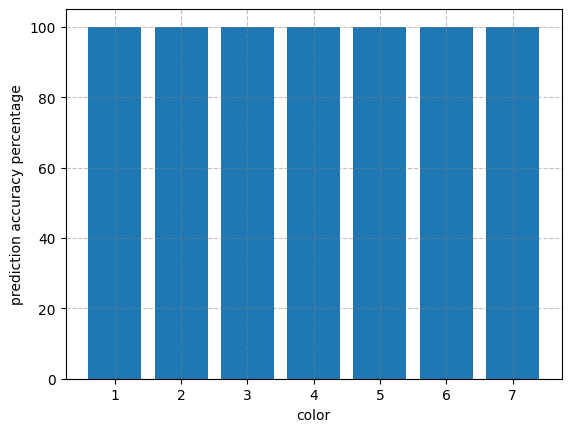

In [36]:
plt.bar(class_list,accuracy_list,)
plt.grid(alpha=0.5, linestyle='--', color='gray')
plt.xlabel('color')
plt.xticks(class_list)
plt.ylabel('prediction accuracy percentage')

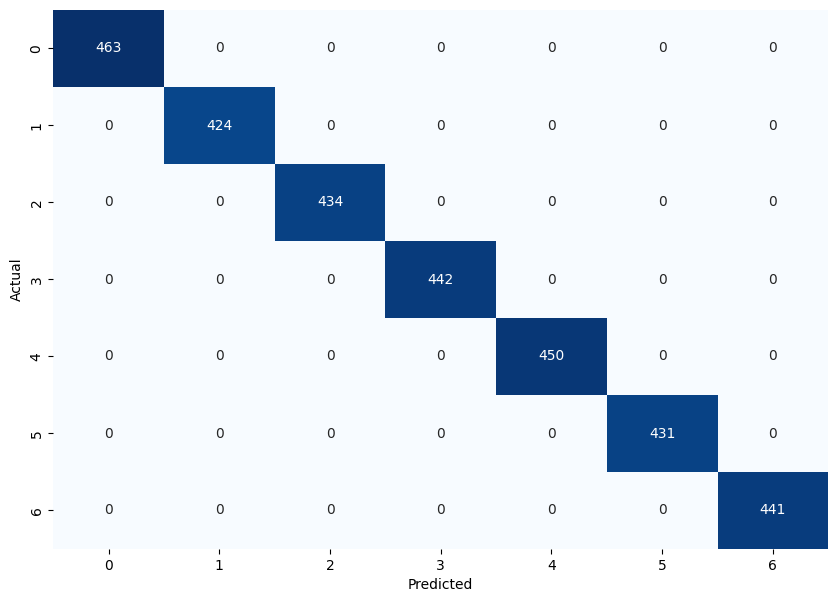

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# things to ask
# how do i make a CORRECT neural network architecture diagram
# are we 100% sure my classification is correct
# what other plot could i make to demonstrate the performance of my classification model
# is this original enough?